In [ ]:
!pip install shap

In [2]:
#This is a cox proportional hazards model on data from NHANES I with followup mortality
#data from the NHANES I Epidemiologic Followup Study.
import matplotlib.pylab as pl
import numpy as np
import xgboost
from sklearn.model_selection import train_test_split
import shap

In [4]:
#Create XGBoost data objects
X, y = shap.datasets.nhanesi()

# human readable feature values
X_display, y_display = shap.datasets.nhanesi(display=True)

xgb_full = xgboost.DMatrix(X, label=y)

# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
xgb_train = xgboost.DMatrix(X_train, label=y_train)
xgb_test = xgboost.DMatrix(X_test, label=y_test)

In [7]:
#Train XGBoost model

params = {"eta": 0.002, "max_depth": 3, "objective": "survival:cox", "subsample": 0.5}
model = xgboost.train(
    params, xgb_train, 10000, evals=[(xgb_test, "test")], verbose_eval=1000
)

[0]	test-cox-nloglik:7.67918
[1000]	test-cox-nloglik:7.02985
[2000]	test-cox-nloglik:6.97516
[3000]	test-cox-nloglik:6.96240
[4000]	test-cox-nloglik:6.96217
[5000]	test-cox-nloglik:6.96558
[6000]	test-cox-nloglik:6.96995
[7000]	test-cox-nloglik:6.97310
[8000]	test-cox-nloglik:6.97721
[9000]	test-cox-nloglik:6.98116
[9999]	test-cox-nloglik:6.98511


In [8]:
shap_values = shap.TreeExplainer(model).shap_values(X)

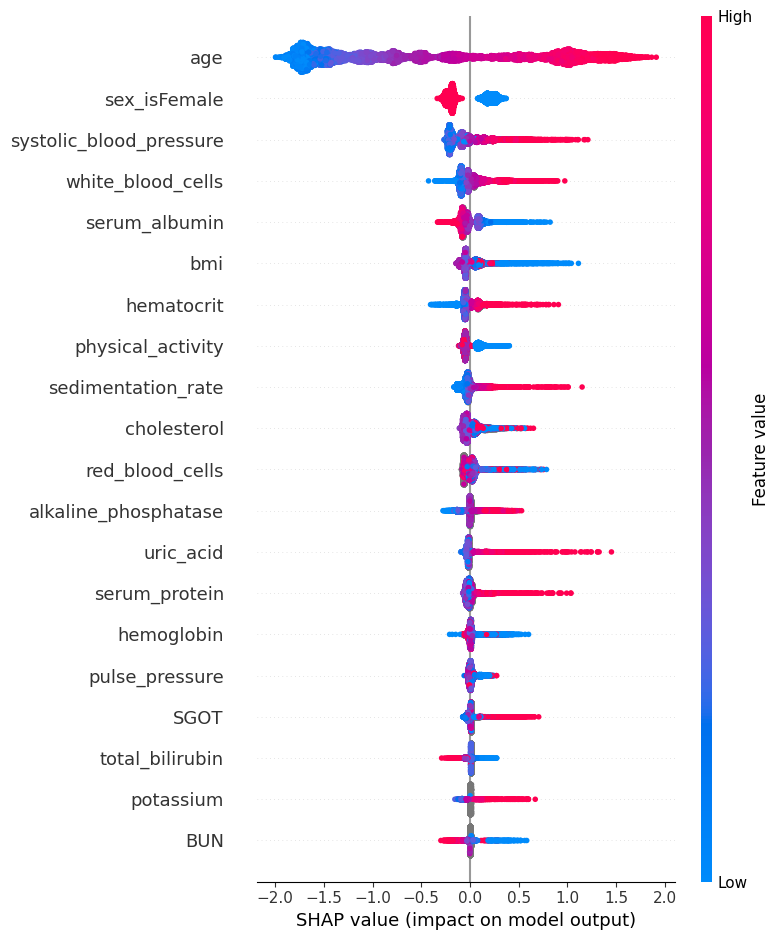

In [9]:
shap.summary_plot(shap_values, X)

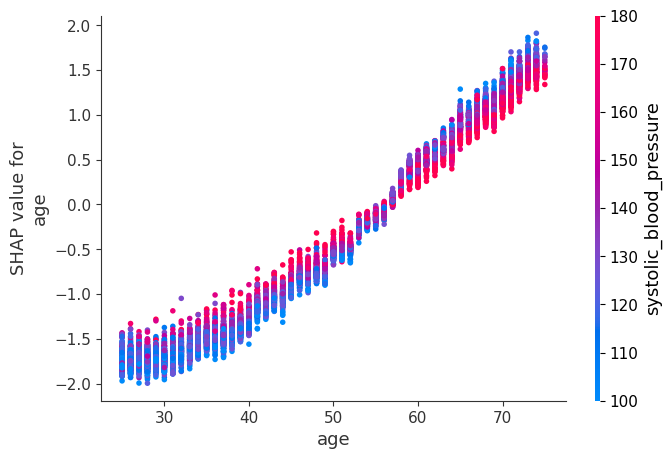

In [11]:
shap.dependence_plot("age", shap_values, X)